In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#import data
data_set = pd.read_excel('Absenteeism_at_work.xls')

data_set.head()

#Find missing values (there is no null value)
data_set.isnull().sum()

#finding datatypes  of variables (there is one float variable- work )
data_set.dtypes


ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [ ]:
!pip install pyfpgrowth
!pip install pyECLAT


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5488 sha256=ddb7f5e384a8acf585eba91ef7f16839a838c41ccae5e533f0e1a87b97d87195
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Apriori

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_excel('Absenteeism_at_work.xls')

# Converts the dataset into a list of transactions
transactions = []
for i in range(len(data)):
    transaction = []
    for col in data.columns:
        if col != 'ID':  # Drops the ID column
            transaction.append(f'{col}={data.at[i, col]}') # Creates a string representation of each item in the transaction by concatenating the column name, an equal sign, and the corresponding cell value
    transactions.append(transaction)

# Encodes transactions into a binary matrix
encoder = TransactionEncoder()
 # transforms the transactions into a matrix format
encoded_transactions = encoder.fit_transform(transactions)
transaction_matrix = pd.DataFrame(encoded_transactions, columns=encoder.columns_)


# Apriori algorithm finds frequent itemsets in the transaction matrix
frequent_itemsets = apriori(transaction_matrix, min_support=0.4 , use_colnames=True)

# Prints the frequent itemsets and their corresponding support values
print("Frequent Itemsets:")
for index, row in frequent_itemsets.iterrows():
    print(f"{row['itemsets']}: {row['support']}")

# Generate association rules from the frequent itemsets
min_confidence = 0.7  # You can adjust this value based on your desired minimum confidence
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)

# Print the generated rules
print("\nAssociation Rules:")
for index, rule in rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    confidence = rule['confidence']
    print(f"{antecedents} => {consequents} (confidence={confidence:.2f})")

Frequent Itemsets:
frozenset({'Disciplinary failure=0'}): 0.9459459459459459
frozenset({'Education=1'}): 0.8256756756756757
frozenset({'Pet=0'}): 0.6216216216216216
frozenset({'Social drinker=0'}): 0.43243243243243246
frozenset({'Social drinker=1'}): 0.5675675675675675
frozenset({'Social smoker=0'}): 0.927027027027027
frozenset({'Son=0'}): 0.4027027027027027
frozenset({'Disciplinary failure=0', 'Education=1'}): 0.777027027027027
frozenset({'Disciplinary failure=0', 'Pet=0'}): 0.5864864864864865
frozenset({'Disciplinary failure=0', 'Social drinker=0'}): 0.41486486486486485
frozenset({'Social drinker=1', 'Disciplinary failure=0'}): 0.5310810810810811
frozenset({'Disciplinary failure=0', 'Social smoker=0'}): 0.8837837837837837
frozenset({'Education=1', 'Pet=0'}): 0.49324324324324326
frozenset({'Social drinker=1', 'Education=1'}): 0.5527027027027027
frozenset({'Education=1', 'Social smoker=0'}): 0.7797297297297298
frozenset({'Social drinker=1', 'Pet=0'}): 0.40540540540540543
frozenset({'Pe

# FP-Growth

In [ ]:
import pandas as pd
import pyfpgrowth

data = pd.read_excel('Absenteeism_at_work.xls')

# Convert the dataset into a list of transactions
transactions = []
for i in range(len(data)):
    transaction = []
    for col in data.columns:
        if col != 'ID':
            transaction.append(f'{col}={data.at[i, col]}')
    transactions.append(transaction)

# Generate frequent itemsets using the FP-Growth algorithm
min_support = 0.4  # We thought this was an adequate value for min_support upon different runs

# Constructs FP-Tree, uses DFS and "pattern grwoth" technique (recursively combines the frequent items to find larger itemsets)
# Returns a dict
patterns = pyfpgrowth.find_frequent_patterns(transactions, len(transactions) * min_support)


# Print the frequent patterns
print("Frequent Patterns:")
for pattern in patterns:
    print(f'{pattern}: {patterns[pattern]}')

min_confidence = 0.7  # Threshold value
# Generates association rules from the frequent itemsets
# Confidence = (support of the itemset/support of the previous itemset)
rules = pyfpgrowth.generate_association_rules(patterns, min_confidence)

# Printing part
print("\nAssociation Rules:")
for rule in rules:
    antecedent = ', '.join(rule)
    consequent = ', '.join(rules[rule][0])
    confidence = rules[rule][1]
    print(f'{antecedent} => {consequent} (confidence={confidence:.2f})')

Frequent Patterns:
('Son=0',): 298
('Social drinker=0',): 320
('Disciplinary failure=0', 'Social drinker=0'): 307
('Pet=0', 'Social drinker=1'): 300
('Education=1', 'Pet=0', 'Social drinker=1'): 300
('Disciplinary failure=0', 'Social drinker=1', 'Social smoker=0'): 376
('Disciplinary failure=0', 'Education=1', 'Social drinker=1', 'Social smoker=0'): 365
('Disciplinary failure=0', 'Education=1', 'Social drinker=1'): 382
('Social drinker=1', 'Social smoker=0'): 400
('Education=1', 'Social drinker=1', 'Social smoker=0'): 389
('Education=1', 'Social drinker=1'): 409
('Disciplinary failure=0', 'Education=1', 'Pet=0'): 342
('Disciplinary failure=0', 'Education=1', 'Pet=0', 'Social smoker=0'): 330
('Education=1', 'Pet=0', 'Social smoker=0'): 350
('Pet=0', 'Social smoker=0'): 425
('Disciplinary failure=0', 'Pet=0', 'Social smoker=0'): 402
('Disciplinary failure=0', 'Pet=0'): 434
('Disciplinary failure=0', 'Education=1'): 575
('Disciplinary failure=0', 'Education=1', 'Social smoker=0'): 549
('E

# K-Means

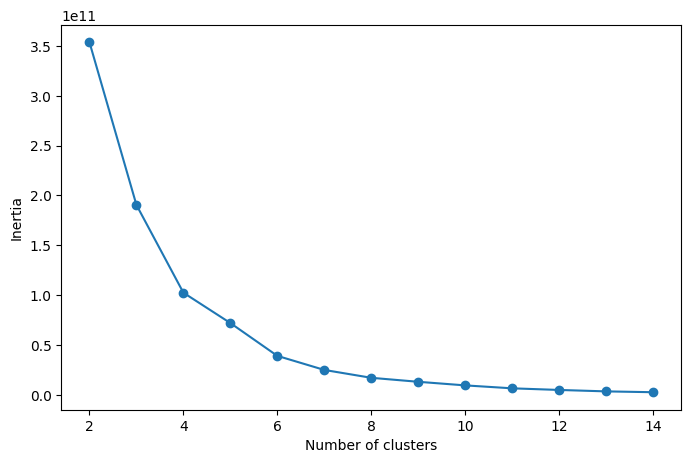


Silhouette score for 4 clusters k-means : 0.578 
Silhouette score for 5 clusters k-means : 0.586 
Silhouette score for 6 clusters k-means : 0.641 
Silhouette score for 7 clusters k-means : 0.667 
Silhouette score for 8 clusters k-means : 0.676 

Davies Bouldin Score for 4 clusters: 0.537
Davies Bouldin Score for 5 clusters: 0.455
Davies Bouldin Score for 6 clusters: 0.428
Davies Bouldin Score for 7 clusters: 0.401
Davies Bouldin Score for 8 clusters: 0.407



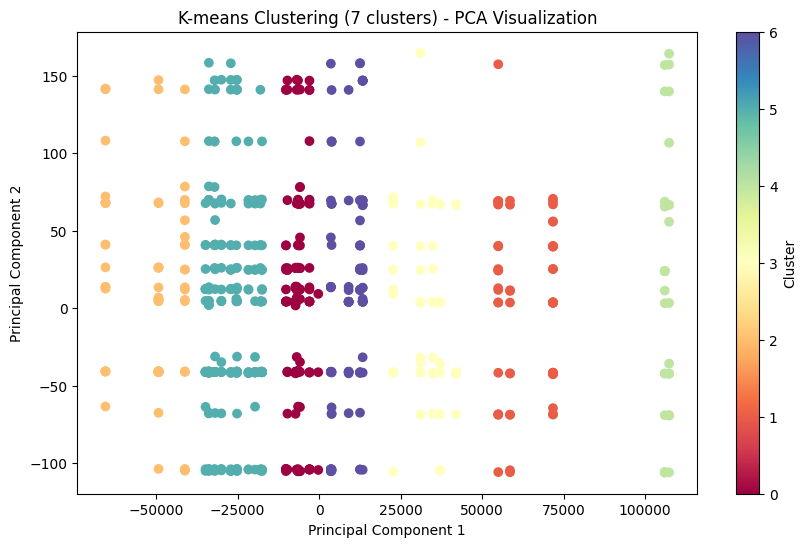

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

data_set = pd.read_excel('Absenteeism_at_work.xls')

# selected_columns = ["Reason for absence", "Month of absence"]
# df_selected = data_set[selected_columns]

df_selected = data_set.drop('ID', axis=1)


#For missing values
df_processed = df_selected.dropna()

scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_processed)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print("")


# The Silhoutte score measurements. Applied from 4 clusters to 8. From the information that we see on elbow method.
for i in range(4,9):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_processed)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_processed,kmeans_labels, metric='euclidean').round(3)))

print("") 

# The values of Silhouette scores are close to each other in range 4 to 8. 
# Calculate Davies Bouldin Score for clusters 4 to 8.

for i in range(4,9):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_processed)
    print("Davies Bouldin Score for {} clusters: ".format(i)+str(metrics.davies_bouldin_score(df_processed,kmeans_labels).round(3)))

print("")




kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_processed)
     
# Apply PCA for visualization.

pca = PCA(n_components=2).fit_transform(df_processed)


pca = PCA(n_components=2).fit_transform(df_processed)

plt.figure(figsize=(10, 6))
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans_labels, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (7 clusters) - PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

# AGNES (Agglomerative Nesting)

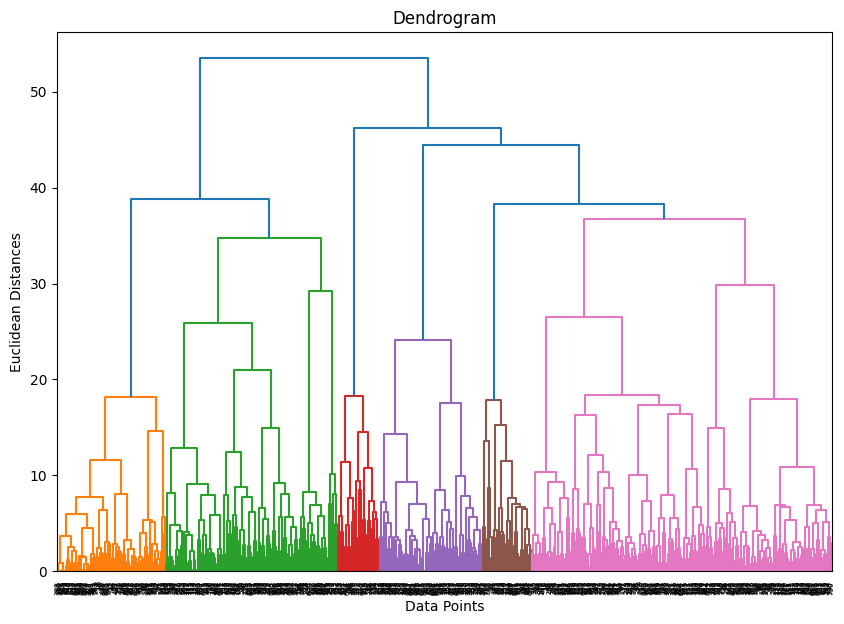

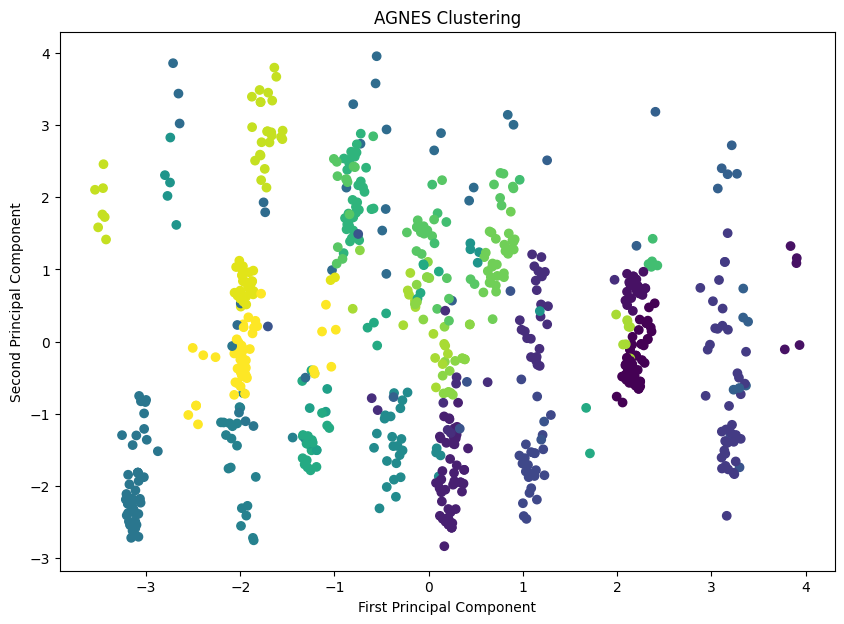

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

data = pd.read_excel('Absenteeism_at_work.xls')
data = data.drop('ID', axis=1)  # Drops the ID column

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

Z = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

cluster_labels = fcluster(Z, t=15, criterion='distance')
data['Cluster'] = cluster_labels

# Plotting the 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('AGNES Clustering')
plt.show()


# DBSCAN

In [ ]:
from sklearn.decomposition import PCA as pca

results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,10):
  for j in range(2,10):
      dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_processed)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.2, 'Min_Samples':j, 'Number of Cluster':len(np.unique(clusters)),'Silhouette Score':metrics.silhouette_score(df_processed,clusters), 'Davies Bouldin Score':metrics.davies_bouldin_score(df_processed,clusters)}, ignore_index=True)
          
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
11,0.8,4.0,3.0,-0.403734,1.423312
2,0.2,4.0,3.0,-0.403734,1.423312
5,0.4,4.0,3.0,-0.403734,1.423312
8,0.6,4.0,3.0,-0.403734,1.423312
45,1.8,9.0,3.0,-0.466952,2.726300


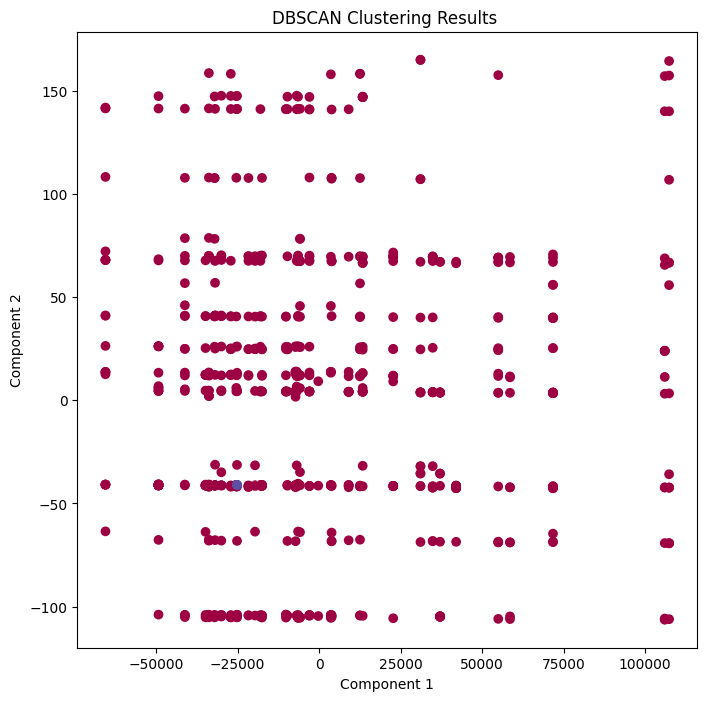

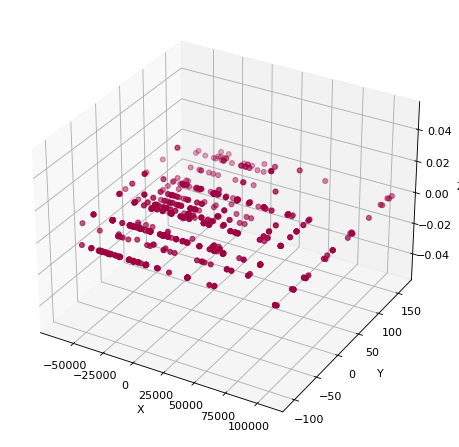

In [ ]:
dbscan_cluster = DBSCAN(eps=0.8, min_samples=4)
db_clusters=dbscan_cluster.fit_predict(df_processed)



pca = PCA(n_components=2).fit_transform(df_processed)

plt.figure(figsize=(8, 8))
plt.scatter(pca[:, 0], pca[:, 1], c=db_clusters, cmap='Spectral')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DBSCAN Clustering Results ')
plt.show()


pca = PCA(n_components=2).fit_transform(df_processed)

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')               
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')